# Screen shot

In [49]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/9/"
    for i in range(0,20):
        time.sleep(5)
        im=ImageGrab.grab(bbox=(60,230,710,810))
        print("saved....",i)
        im.save(images_folder+str(i+80)+'.png')
        print("clear screen and redraw..")
    

saved.... 0
clear screen and redraw..
saved.... 1
clear screen and redraw..
saved.... 2
clear screen and redraw..
saved.... 3
clear screen and redraw..
saved.... 4
clear screen and redraw..
saved.... 5
clear screen and redraw..
saved.... 6
clear screen and redraw..
saved.... 7
clear screen and redraw..
saved.... 8
clear screen and redraw..
saved.... 9
clear screen and redraw..
saved.... 10
clear screen and redraw..
saved.... 11
clear screen and redraw..
saved.... 12
clear screen and redraw..
saved.... 13
clear screen and redraw..
saved.... 14
clear screen and redraw..
saved.... 15
clear screen and redraw..
saved.... 16
clear screen and redraw..
saved.... 17
clear screen and redraw..
saved.... 18
clear screen and redraw..
saved.... 19
clear screen and redraw..


In [12]:
import cv2
import csv
import glob

header =["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)


for label in range(10):
    dirList=glob.glob("captured_images/"+str(label)+"/*.png")
    
    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray =cv2.GaussianBlur(im_gray,(15,15),0)
        roi= cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows, cols = roi.shape
        
        ## Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

                

In [13]:
# load the dataset

In [14]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data=shuffle(data)
data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
392,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
948,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# sepration of dependent and independent variable

In [15]:
X = data.drop(["label"],axis=1)
Y =data["label"]

# preview of one image using matplotlib

3


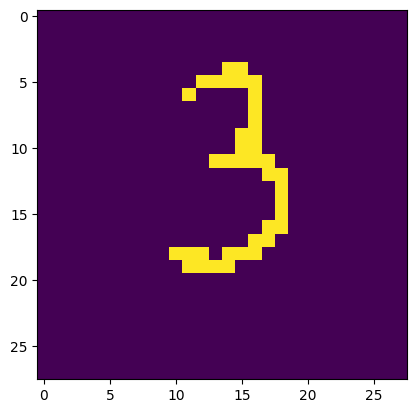

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx =314
img =X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [17]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(X,Y, test_size =0.2)

# fit the model using svc and also to save the model using joblib

In [18]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# calculate accuracy

In [19]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.925


# prediction of image drawn in paint

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(60,230,710,810))
    
    img.save(images_folder+"img.png")
    im=cv2.imread(images_folder+"img.png")
    im_gray= cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray= cv2.GaussianBlur(im_gray, (15,15),0)
    
    #threshold the image
    ret, im_th=cv2.threshold(im_gray,100,255,cv2.THRESH_BINARY)
    roi=cv2.resize(im_th,(28,28),interpolation =cv2.INTER_AREA)
    
    rows,cols=roi.shape
    
    X=[]
    
    ##add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k=roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
            
            
    predictions =model.predict([X])
    print("Prediction: ",predictions[0])
    cv2.putText(im,"Prediction is: "+str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()
